# Drug Consumption: Mais Testes com Classificadores

In [1]:
import pandas as pd
import utils as ut

from importlib import reload

reload(ut)

<module 'utils' from '/home/mmamaral/2024-1-P1-Drug-Consumption/notebooks/utils.py'>

In [2]:
data = pd.read_csv("../data/drug_consumption_preprocessed.csv", index_col="ID")
pd.set_option("display.max_columns", None)

# Executa as filtragens feitas no notebook "classification.ipynb"
X, y = ut.build_dataset(data)

# Coloque "True" se quiser rodar os experimentos ao invés de carregar resultados anteriores.
run = False

ut.create_dirs()

# Observações e Mini-Experimentos

### Análise somente com métricas de personalidade
Tentamos descobrir as relações entre as métricas e as substâncias, de forma que outras características sejam ocultas.

In [3]:
t = 2


def metrics_run():
    x_ = X[ut.numCols]
    labels = y.applymap(ut.threshold, t=[t])
    return ut.test_classifiers(x_, labels)


results_metrics, cm_metrics = ut.run_or_load(
    "../results/metrics_{a}.csv", metrics_run if run else None
)

/home/mmamaral/2024-1-P1-Drug-Consumption/notebooks/utils.py:319: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  g = g.pivot_table(


Substância               Alcohol              Amphet                Amyl  \
                            mean       std      mean       std      mean   
Model                                                                      
BernoulliNB             0.500000  0.000000  0.644458  0.035448  0.500459   
GaussianNB              0.500000  0.000000  0.659441  0.032794  0.503900   
KNeighborsClassifier    0.499632  0.000955  0.633699  0.030887  0.506471   
NearestCentroid         0.604400  0.082416  0.684828  0.034560  0.600148   
RandomForestClassifier  0.500000  0.000000  0.636385  0.035459  0.499809   

Substância                          Benzos              Caff            \
                             std      mean       std    mean       std   
Model                                                                    
BernoulliNB             0.002516  0.649295  0.026610  0.5000  0.000000   
GaussianNB              0.014816  0.652773  0.034993  0.5000  0.000000   
KNeighborsClassifier    0.012500  0.639492  0.039544  0.5000  0.000000   
NearestCentroid         0.038922  0.671428  0.033238  0.6593  0.111982   
RandomForestClassifier  0.003195  0.639806  0.024457  0.5000  0.000000   

Substância              Cannabis                Choc               Coke  \
                            mean       std      mean      std      mean   
Model                                                                     
BernoulliNB             0.697954  0.034217  0.500000  0.00000  0.631520   
GaussianNB              0.720442  0.033660  0.500000  0.00000  0.644284   
KNeighborsClassifier    0.699310  0.028957  0.500000  0.00000  0.623048   
NearestCentroid         0.724601  0.032451  0.467757  0.15833  0.664471   
RandomForestClassifier  0.705717  0.028075  0.500000  0.00000  0.624384   

Substância                           Crack             Ecstasy            \
                             std      mean       std      mean       std   
Model                                                                      
BernoulliNB             0.035019  0.500285  0.001564  0.678062  0.035571   
GaussianNB              0.034221  0.531687  0.037410  0.691294  0.037645   
KNeighborsClassifier    0.034710  0.499210  0.001893  0.673817  0.039671   
NearestCentroid         0.028166  0.656612  0.048763  0.704010  0.035601   
RandomForestClassifier  0.029962  0.499013  0.001618  0.681909  0.028182   

Substância                Heroin            Ketamine                 LSD  \
                            mean       std      mean       std      mean   
Model                                                                      
BernoulliNB             0.565786  0.034154  0.567772  0.034249  0.647999   
GaussianNB              0.597952  0.048545  0.569517  0.033584  0.682230   
KNeighborsClassifier    0.505715  0.013638  0.527264  0.023044  0.640333   
NearestCentroid         0.691438  0.063799  0.647145  0.050698  0.702991   
RandomForestClassifier  0.511234  0.019127  0.504860  0.010636  0.656162   

Substância                          Legalh                Meth            \
                             std      mean       std      mean       std   
Model                                                                      
BernoulliNB             0.039562  0.699014  0.034277  0.602772  0.034352   
GaussianNB              0.036971  0.714780  0.029825  0.622760  0.037756   
KNeighborsClassifier    0.029782  0.678397  0.037009  0.545647  0.025864   
NearestCentroid         0.032722  0.714889  0.029979  0.677594  0.049413   
RandomForestClassifier  0.024374  0.700367  0.027311  0.533734  0.029270   

Substância             Mushrooms            Nicotine                 VSA  \
                            mean       std      mean       std      mean   
Model                                                                      
BernoulliNB             0.669471  0.039427  0.634625  0.032435  0.546426   
GaussianNB              0.685958  0.029959  0.641164  0.036480  0.

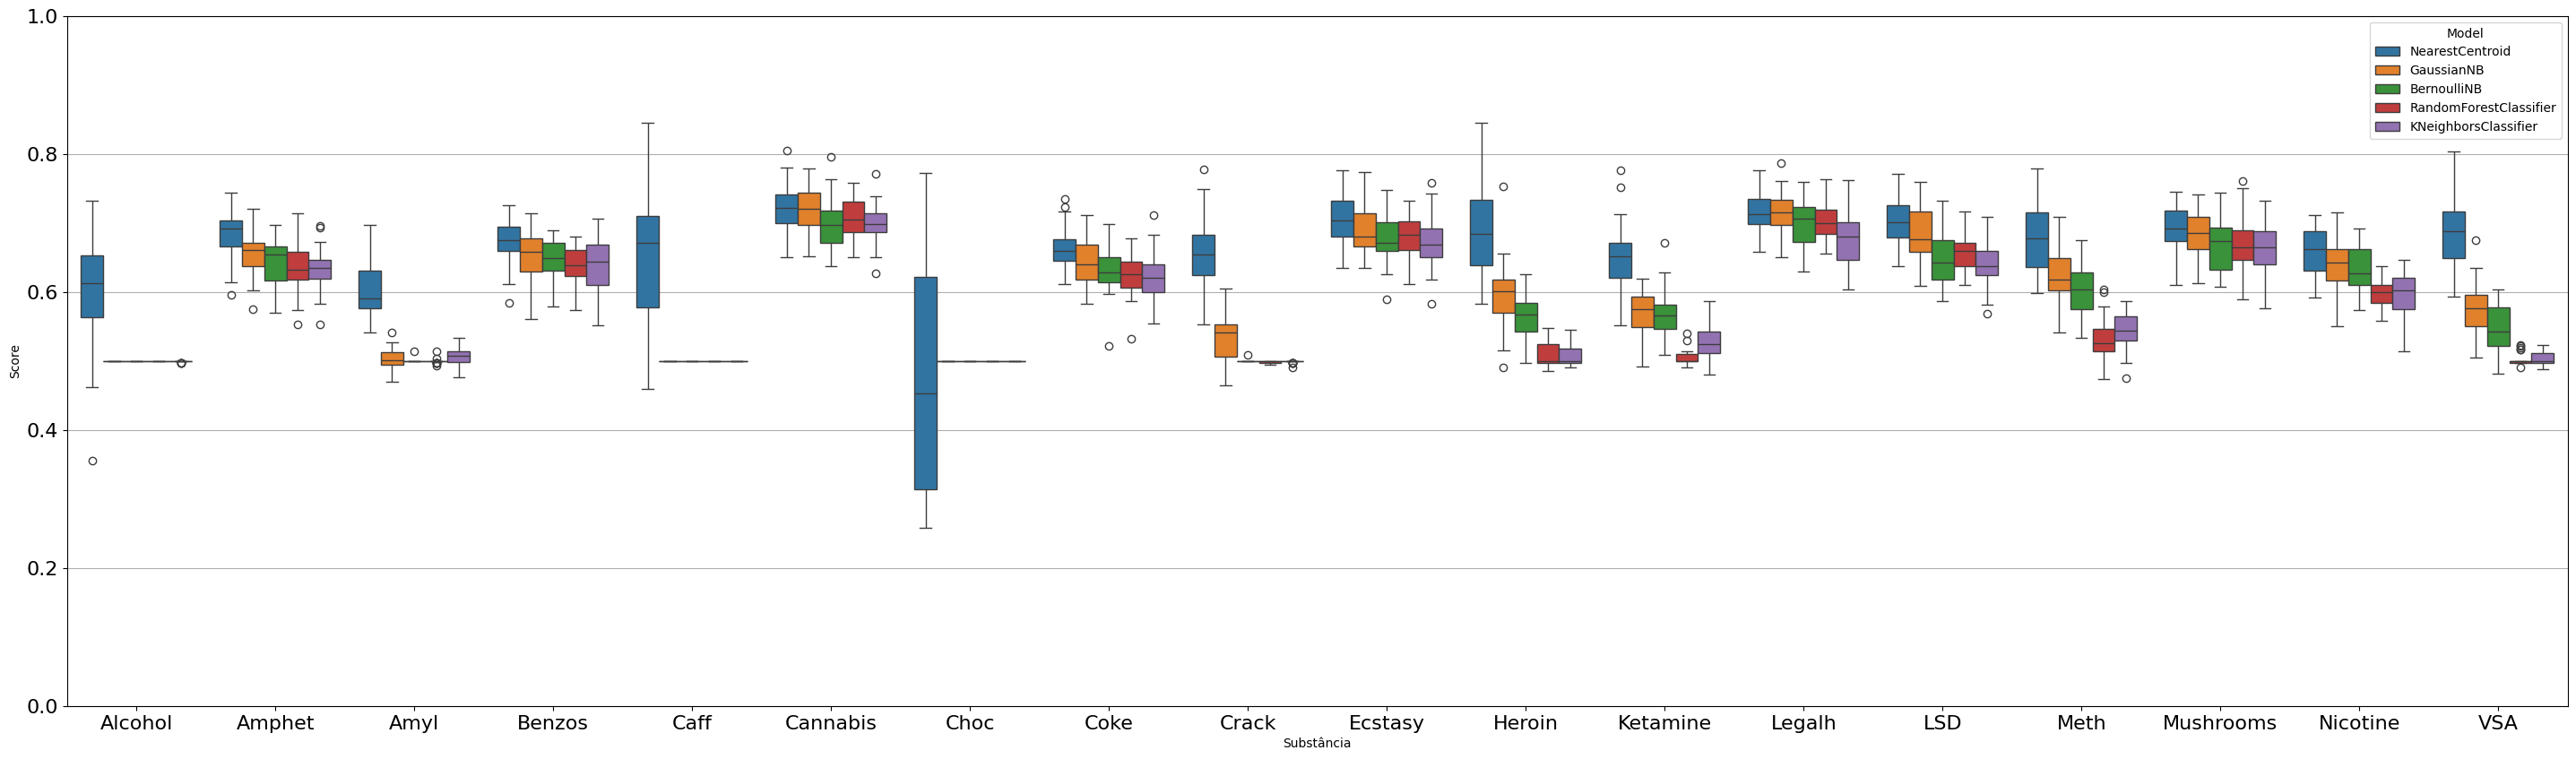

In [4]:
fig = ut.boxplot(
    results_metrics,
    title=f"Boxplot com resultados somente utilizando as métricas de personalidade (t={t})",
    lims=(0, 1),
    refs=None,
)
ut.show_statistics(results_metrics)

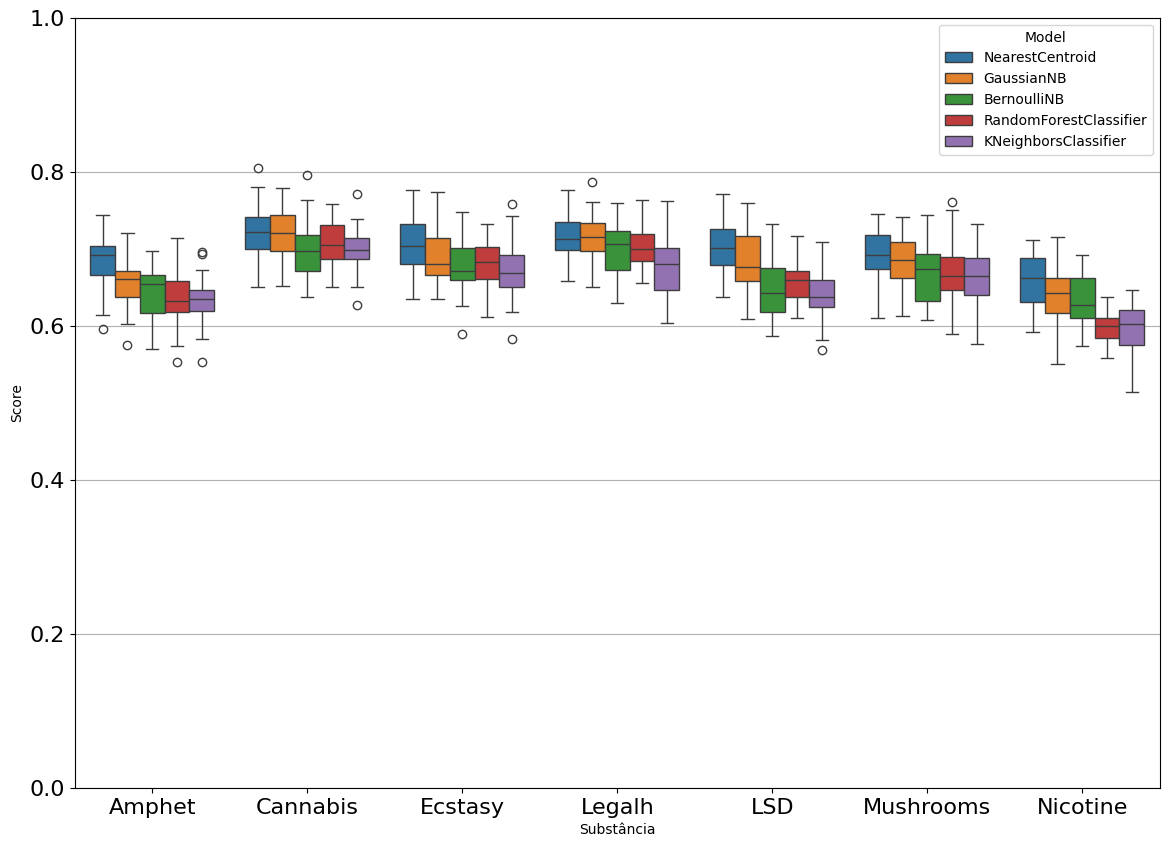

In [5]:
fig = ut.boxplot(
    results_metrics,
    title=f"Boxplot com resultados somente utilizando as métricas de personalidade (t={t})",
    substance_filter=ut.best_k,
)
fig.savefig("../figures/metrics.svg", bbox_inches='tight')

#### Confusion Matrices

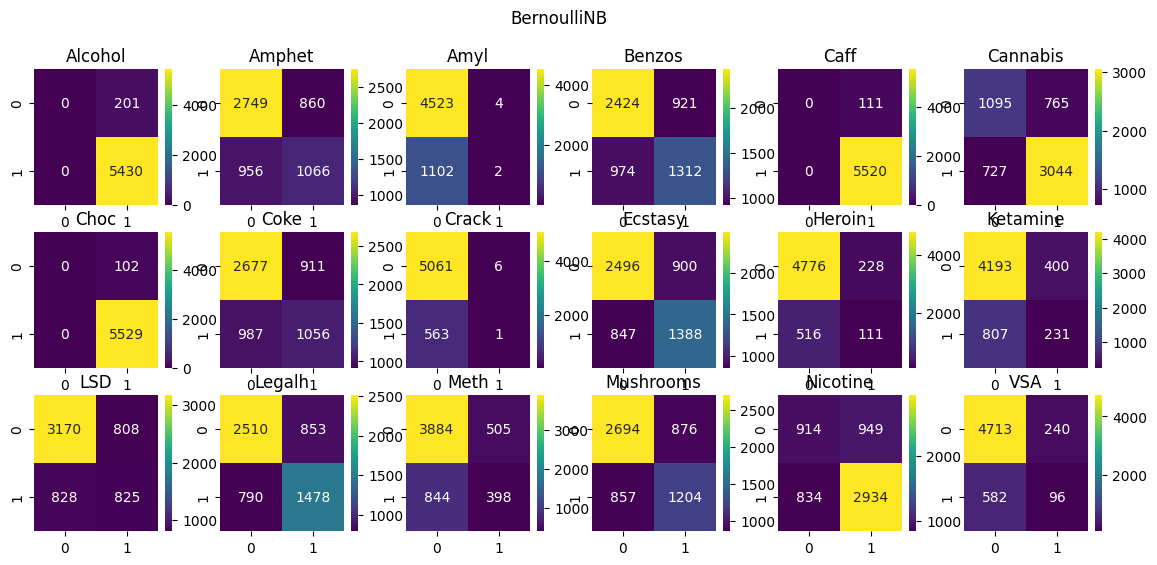

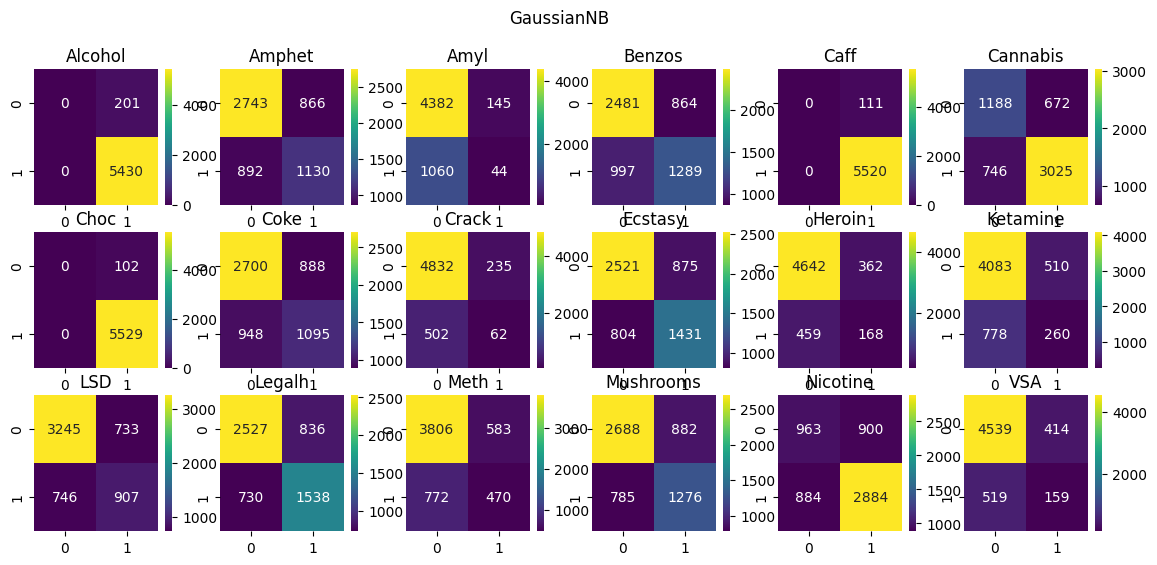

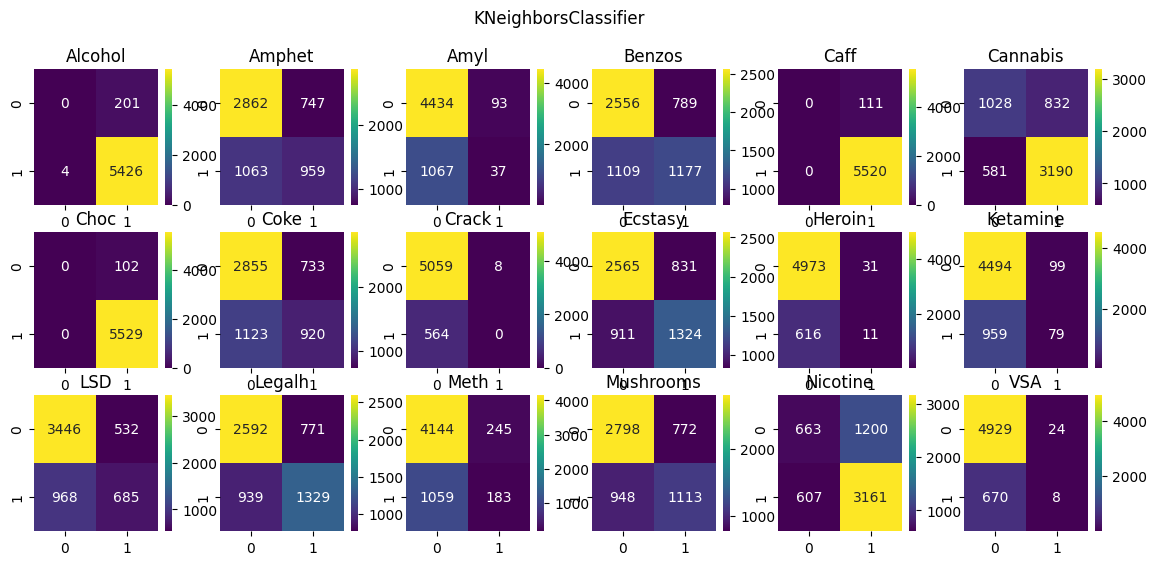

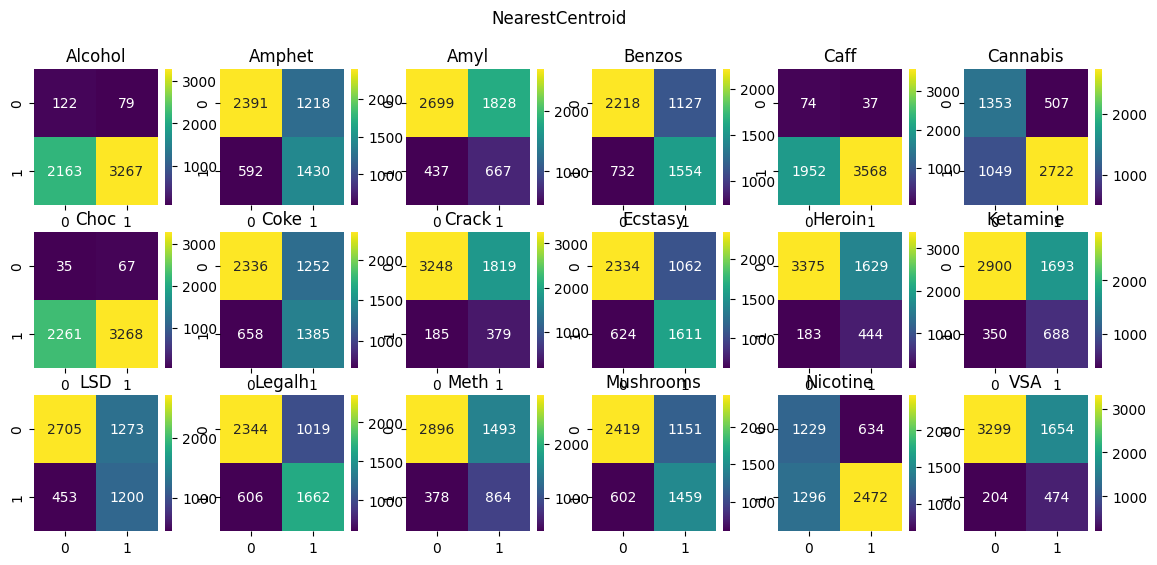

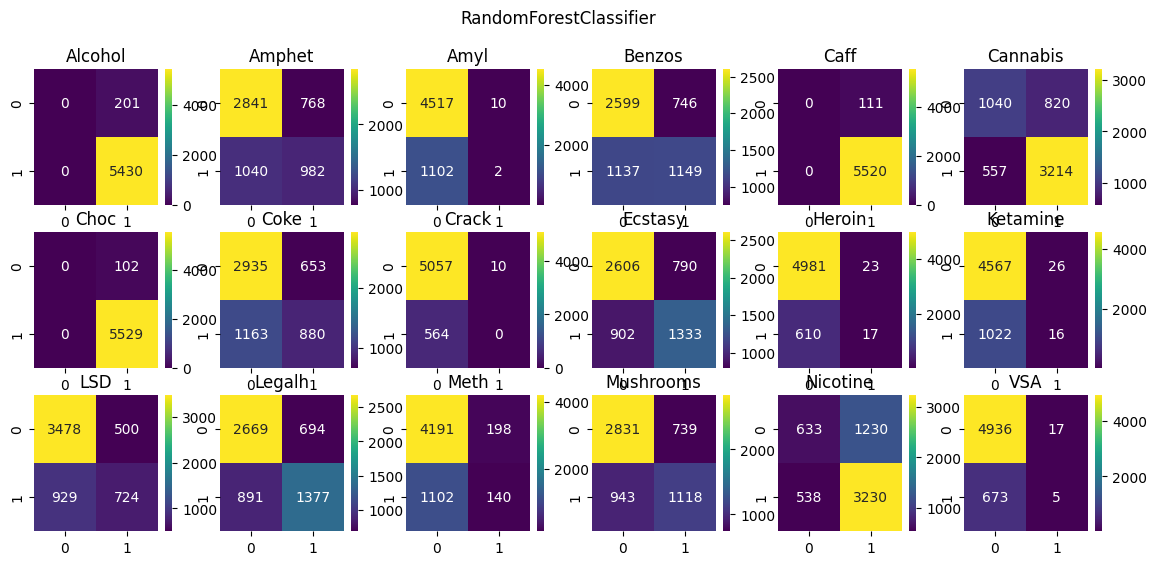

In [6]:
ut.confusion(cm_metrics)

### Análise em um range de idades
Tentamos classificar somente com dados de indívíduos entre 18 a 34 anos. Isso possibilitaria determinar um threshold menor de tempo de uso de uma substância (no último mês, por exemplo).

In [7]:
t = 3


def age_range_run():
    mask = X["Age"] < 2
    x_ = X[mask]
    labels = y[mask].applymap(ut.threshold, t=[t])
    return ut.test_classifiers(x_.drop(columns=["Age"]), labels)


results_age_range, cm_age_range = ut.run_or_load(
    "../results/age_range_{a}.csv", age_range_run if run else None
)

/home/mmamaral/2024-1-P1-Drug-Consumption/notebooks/utils.py:319: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  g = g.pivot_table(


Substância               Alcohol              Amphet                Amyl  \
                            mean       std      mean       std      mean   
Model                                                                      
BernoulliNB             0.500000  0.000000  0.666506  0.044391  0.500000   
GaussianNB              0.499844  0.000853  0.657042  0.050551  0.499667   
KNeighborsClassifier    0.499843  0.000861  0.608821  0.044407  0.504106   
NearestCentroid         0.558679  0.108760  0.686080  0.048992  0.589956   
RandomForestClassifier  0.500000  0.000000  0.611169  0.045412  0.501182   

Substância                          Benzos                Caff            \
                             std      mean       std      mean       std   
Model                                                                      
BernoulliNB             0.000000  0.598964  0.049234  0.500000  0.000000   
GaussianNB              0.001269  0.618433  0.039865  0.498470  0.002784   
KNeighborsClassifier    0.015922  0.597835  0.046522  0.500000  0.000000   
NearestCentroid         0.063324  0.640819  0.053705  0.653858  0.155914   
RandomForestClassifier  0.008457  0.581193  0.042937  0.500000  0.000000   

Substância              Cannabis                Choc                Coke  \
                            mean       std      mean       std      mean   
Model                                                                      
BernoulliNB             0.741851  0.042361  0.500000  0.000000  0.584449   
GaussianNB              0.768299  0.045968  0.499696  0.001159  0.615494   
KNeighborsClassifier    0.749598  0.044252  0.500000  0.000000  0.560013   
NearestCentroid         0.747187  0.050766  0.431686  0.132372  0.633847   
RandomForestClassifier  0.741165  0.038883  0.499848  0.000830  0.572532   

Substância                           Crack             Ecstasy            \
                             std      mean       std      mean       std   
Model                                                                      
BernoulliNB             0.033439  0.516072  0.039830  0.657194  0.040443   
GaussianNB              0.051832  0.544999  0.070235  0.662038  0.039536   
KNeighborsClassifier    0.046349  0.501514  0.014755  0.651305  0.032850   
NearestCentroid         0.046646  0.688612  0.086988  0.660062  0.044710   
RandomForestClassifier  0.033260  0.499686  0.001197  0.617858  0.044609   

Substância                Heroin            Ketamine                 LSD  \
                            mean       std      mean       std      mean   
Model                                                                      
BernoulliNB             0.514088  0.033124  0.524053  0.035738  0.656542   
GaussianNB              0.552681  0.056714  0.536955  0.037576  0.659922   
KNeighborsClassifier    0.506667  0.017287  0.506371  0.013624  0.596155   
NearestCentroid         0.684490  0.061594  0.617779  0.060735  0.684881   
RandomForestClassifier  0.509180  0.019580  0.499522  0.008426  0.610141   

Substância                          Legalh                Meth            \
                             std      mean       std      mean       std   
Model                                                                      
BernoulliNB             0.037666  0.705621  0.040993  0.584309  0.047837   
GaussianNB              0.049414  0.710719  0.035568  0.611577  0.044647   
KNeighborsClassifier    0.042934  0.680144  0.039220  0.563243  0.042729   
NearestCentroid         0.047855  0.702363  0.049244  0.656000  0.046629   
RandomForestClassifier  0.037378  0.700171  0.040239  0.540649  0.032357   

Substância             Mushrooms            Nicotine                 VSA  \
                            mean       std      mean       std      mean   
Model                                                                      
BernoulliNB             0.660739  0.036955  0.665476  0.035538  0.500000   
GaussianNB              0.667433  0.052683

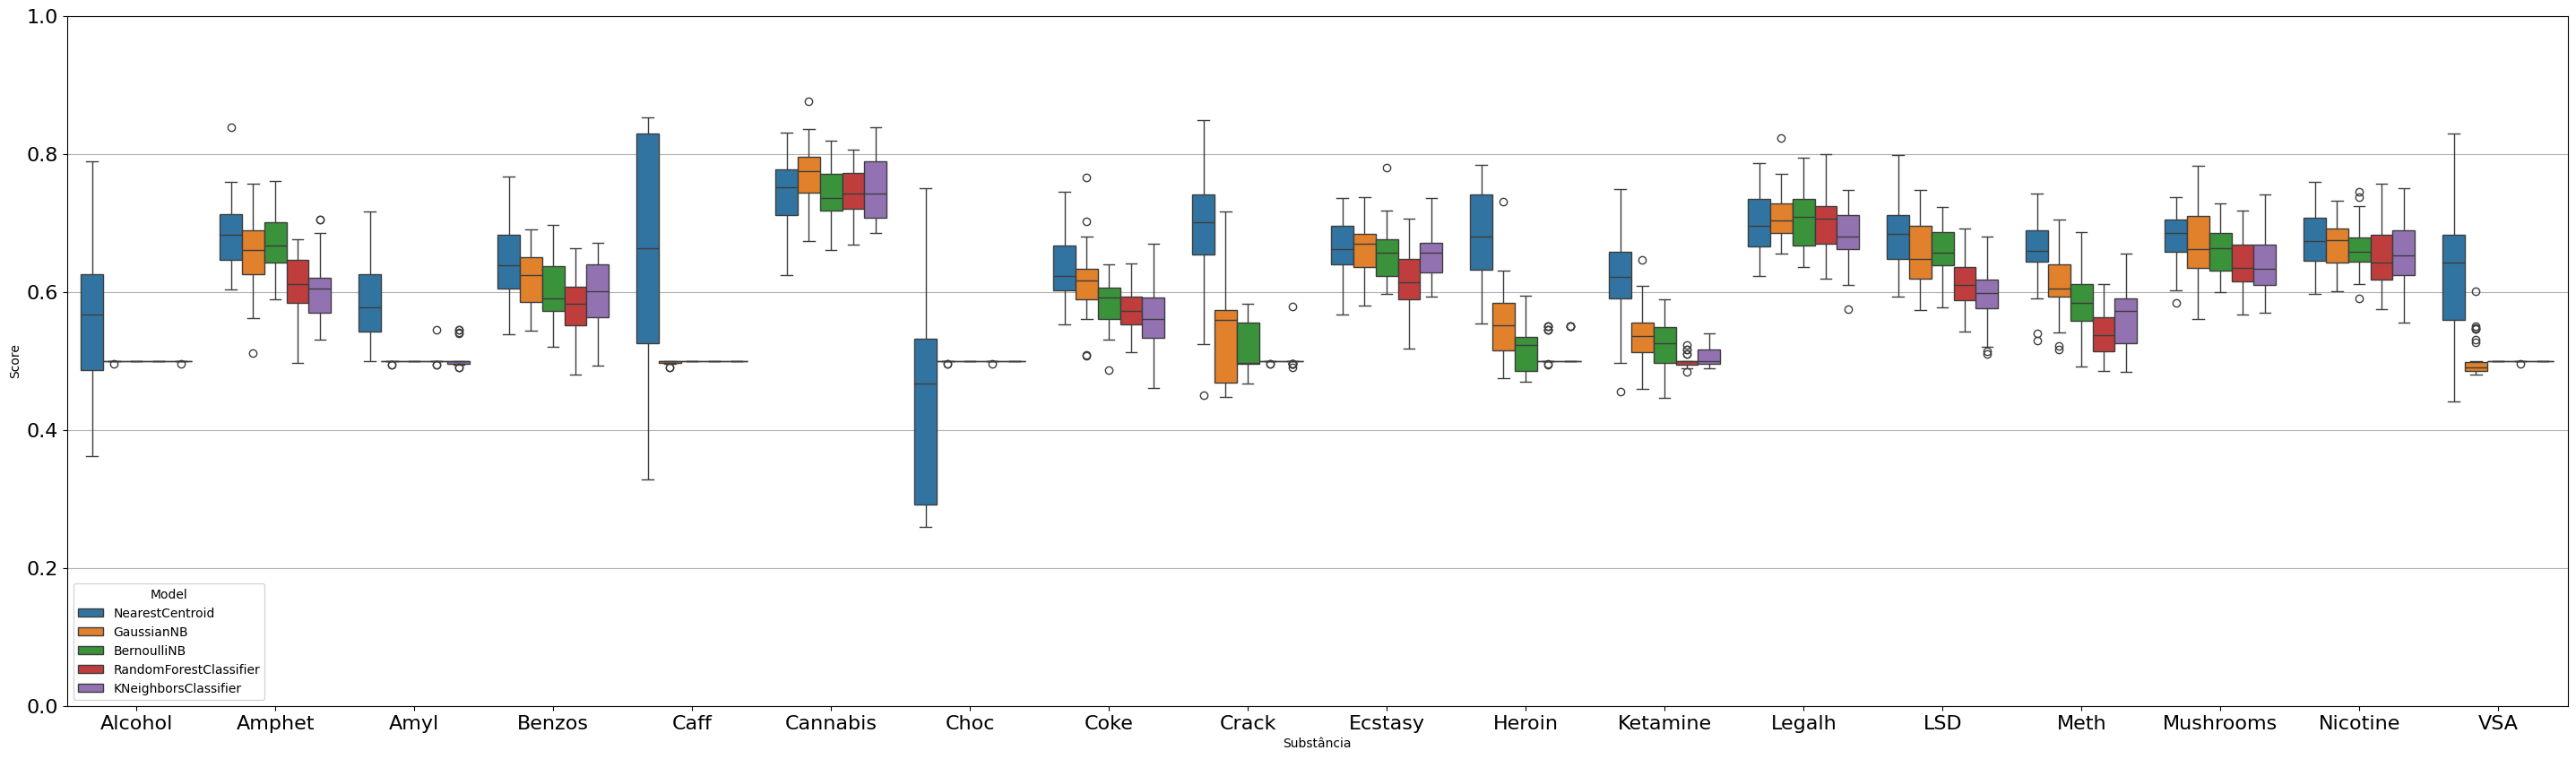

In [8]:
fig = ut.boxplot(
    results_age_range,
    title=f"Boxplot de resultados com um público entre 18 e 34 anos com t={t}",
    lims=(0, 1),
    refs=None,
)
ut.show_statistics(results_age_range)

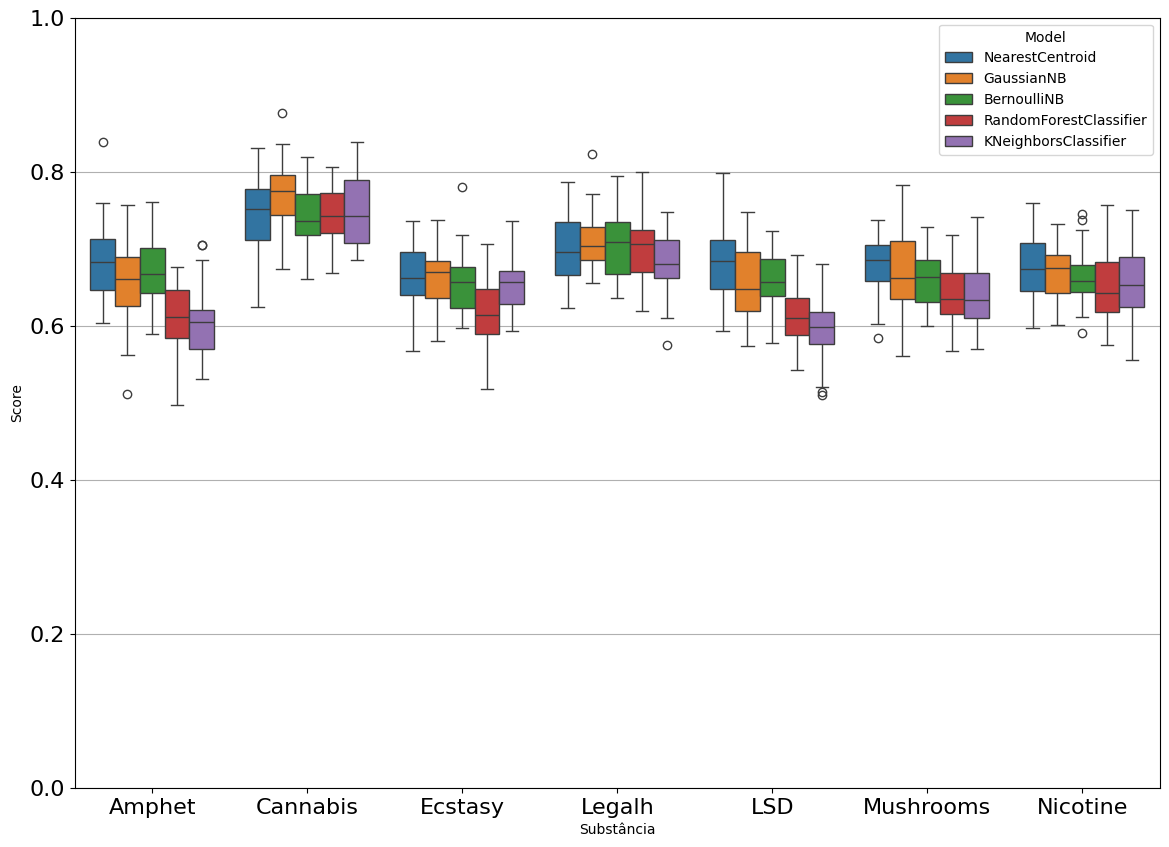

In [9]:
fig = ut.boxplot(
    results_age_range,
    title=f"Boxplot de resultados com um público entre 18 e 34 anos com t={t}",
    substance_filter=ut.best_k,
)
fig.savefig("../figures/age_range.svg", bbox_inches='tight')

#### Confusion Matrices

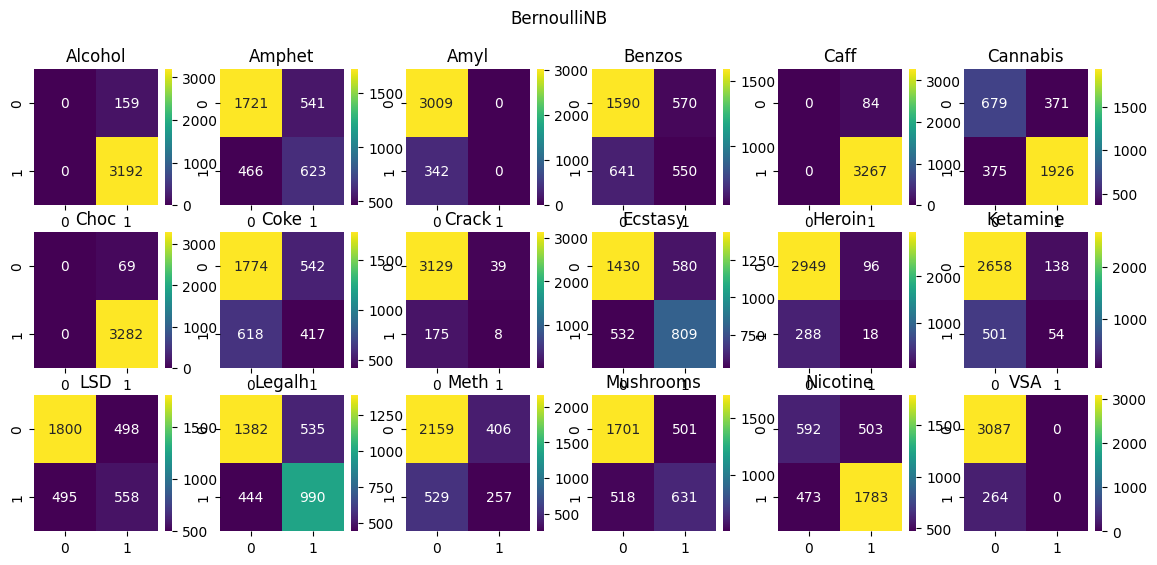

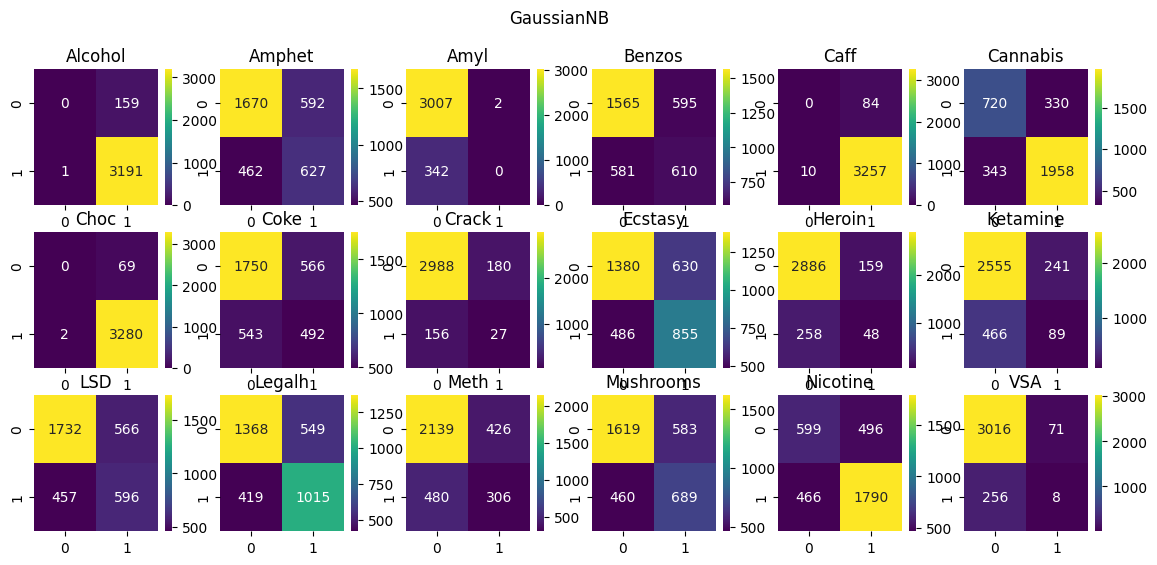

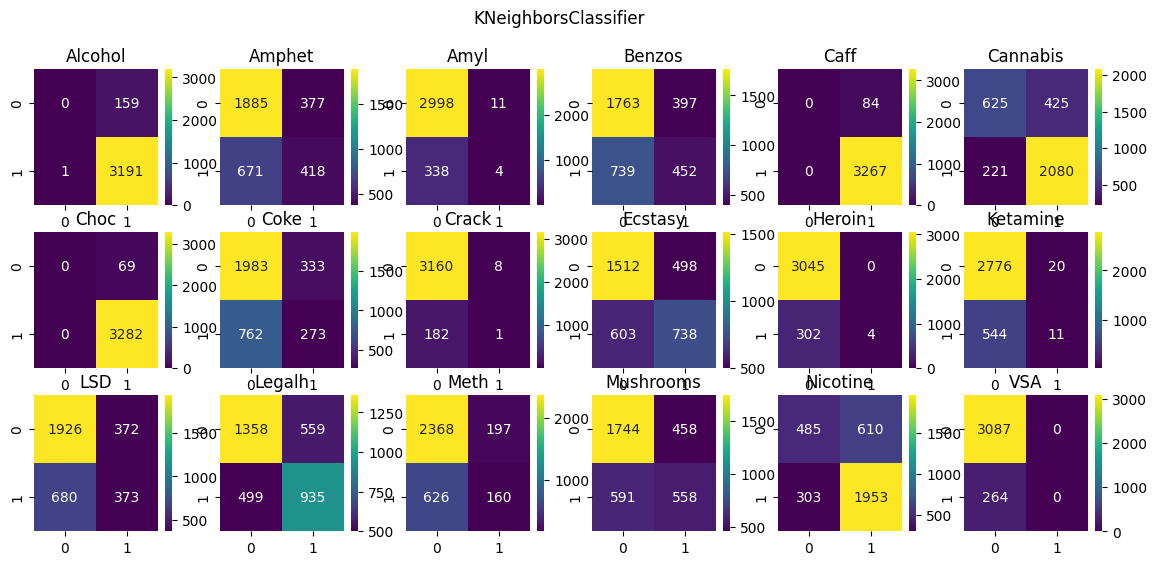

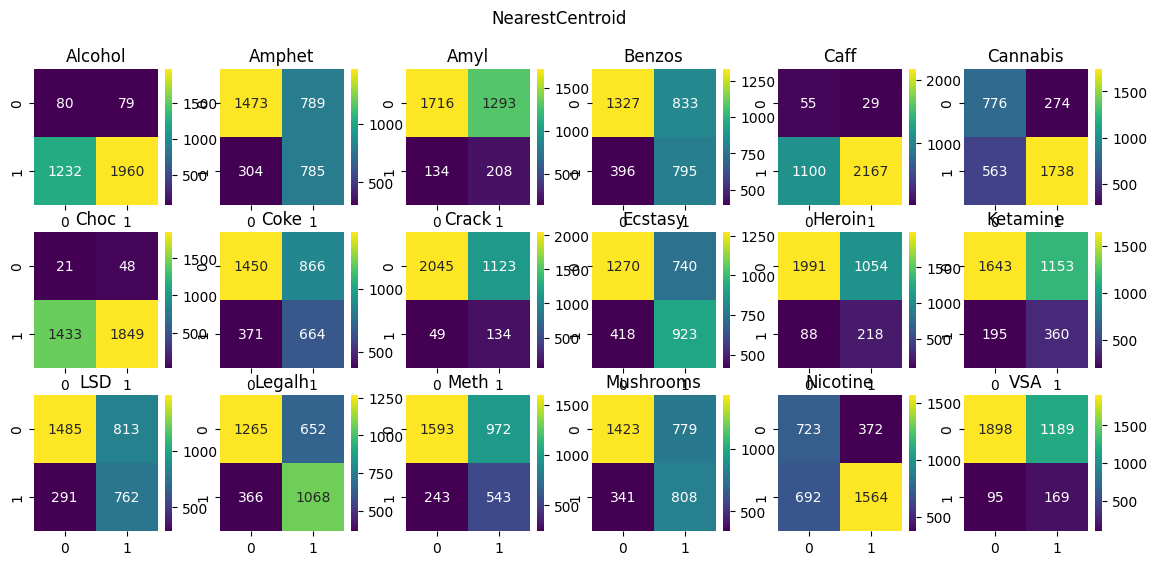

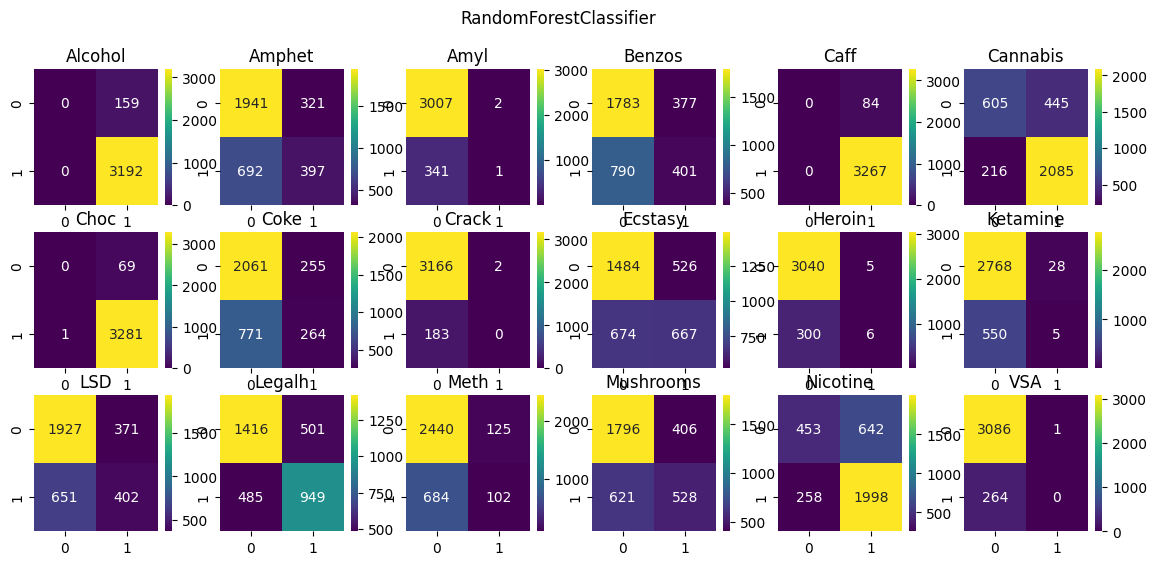

In [10]:
ut.confusion(cm_age_range)

### Análise com PCA
Tentamos aplicar algum tipo de redução de dimensionalidade para observar se há melhorias.

In [11]:
from sklearn.decomposition import PCA

t = 2
pca_comp = 0.95


def pca_run():
    labels = y.applymap(ut.threshold)
    return ut.test_classifiers(
        X, labels, pipe=(ut.metric_preprocessor(), PCA(n_components=pca_comp))
    )


results_pca, cm_pca = ut.run_or_load("../results/pca_{a}.csv", pca_run if run else None)

/home/mmamaral/2024-1-P1-Drug-Consumption/notebooks/utils.py:319: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  g = g.pivot_table(


Substância               Alcohol              Amphet                Amyl  \
                            mean       std      mean       std      mean   
Model                                                                      
BernoulliNB             0.500000  0.000000  0.665028  0.040404  0.500000   
GaussianNB              0.500000  0.000000  0.678992  0.034372  0.499227   
KNeighborsClassifier    0.500000  0.000000  0.660545  0.029852  0.516654   
NearestCentroid         0.635212  0.092150  0.704525  0.027540  0.618381   
RandomForestClassifier  0.499908  0.000504  0.686808  0.029669  0.499359   

Substância                          Benzos                Caff            \
                             std      mean       std      mean       std   
Model                                                                      
BernoulliNB             0.000000  0.638827  0.029270  0.500000  0.000000   
GaussianNB              0.002248  0.654529  0.029955  0.500000  0.000000   
KNeighborsClassifier    0.013909  0.640454  0.039908  0.500000  0.000000   
NearestCentroid         0.036266  0.665831  0.040463  0.684088  0.132295   
RandomForestClassifier  0.003281  0.644758  0.029360  0.500000  0.000000   

Substância              Cannabis                Choc               Coke  \
                            mean       std      mean      std      mean   
Model                                                                     
BernoulliNB             0.734607  0.031628  0.500000  0.00000  0.637889   
GaussianNB              0.758746  0.031498  0.500000  0.00000  0.639287   
KNeighborsClassifier    0.744274  0.029665  0.500000  0.00000  0.656208   
NearestCentroid         0.771404  0.026672  0.487433  0.12052  0.679273   
RandomForestClassifier  0.743171  0.035264  0.500000  0.00000  0.633355   

Substância                           Crack             Ecstasy            \
                             std      mean       std      mean       std   
Model                                                                      
BernoulliNB             0.037424  0.500000  0.000000  0.710625  0.030205   
GaussianNB              0.038680  0.500668  0.007242  0.723032  0.033237   
KNeighborsClassifier    0.035866  0.499593  0.005315  0.719479  0.034317   
NearestCentroid         0.027019  0.654524  0.071133  0.737818  0.023277   
RandomForestClassifier  0.026803  0.502285  0.007688  0.714828  0.034898   

Substância                Heroin            Ketamine                 LSD  \
                            mean       std      mean       std      mean   
Model                                                                      
BernoulliNB             0.500000  0.000000  0.500000  0.000000  0.644178   
GaussianNB              0.507761  0.016133  0.519054  0.017972  0.703680   
KNeighborsClassifier    0.512889  0.019053  0.526775  0.024301  0.685855   
NearestCentroid         0.697994  0.050196  0.670705  0.052340  0.747343   
RandomForestClassifier  0.505942  0.011797  0.505989  0.010197  0.675216   

Substância                          Legalh                Meth            \
                             std      mean       std      mean       std   
Model                                                                      
BernoulliNB             0.030124  0.736298  0.023372  0.505125  0.010324   
GaussianNB              0.032435  0.769121  0.032674  0.561531  0.021438   
KNeighborsClassifier    0.032044  0.763941  0.025099  0.589309  0.038222   
NearestCentroid         0.036999  0.779531  0.036964  0.692705  0.042596   
RandomForestClassifier  0.034880  0.770813  0.021950  0.543238  0.030902   

Substância             Mushrooms            Nicotine                 VSA  \
                            mean       std      mean       std      mean   
Model                                                                      
BernoulliNB             0.696948  0.041842  0.604865  0.030116  0.500000   
GaussianNB              0.715889  0.030362  0.6544

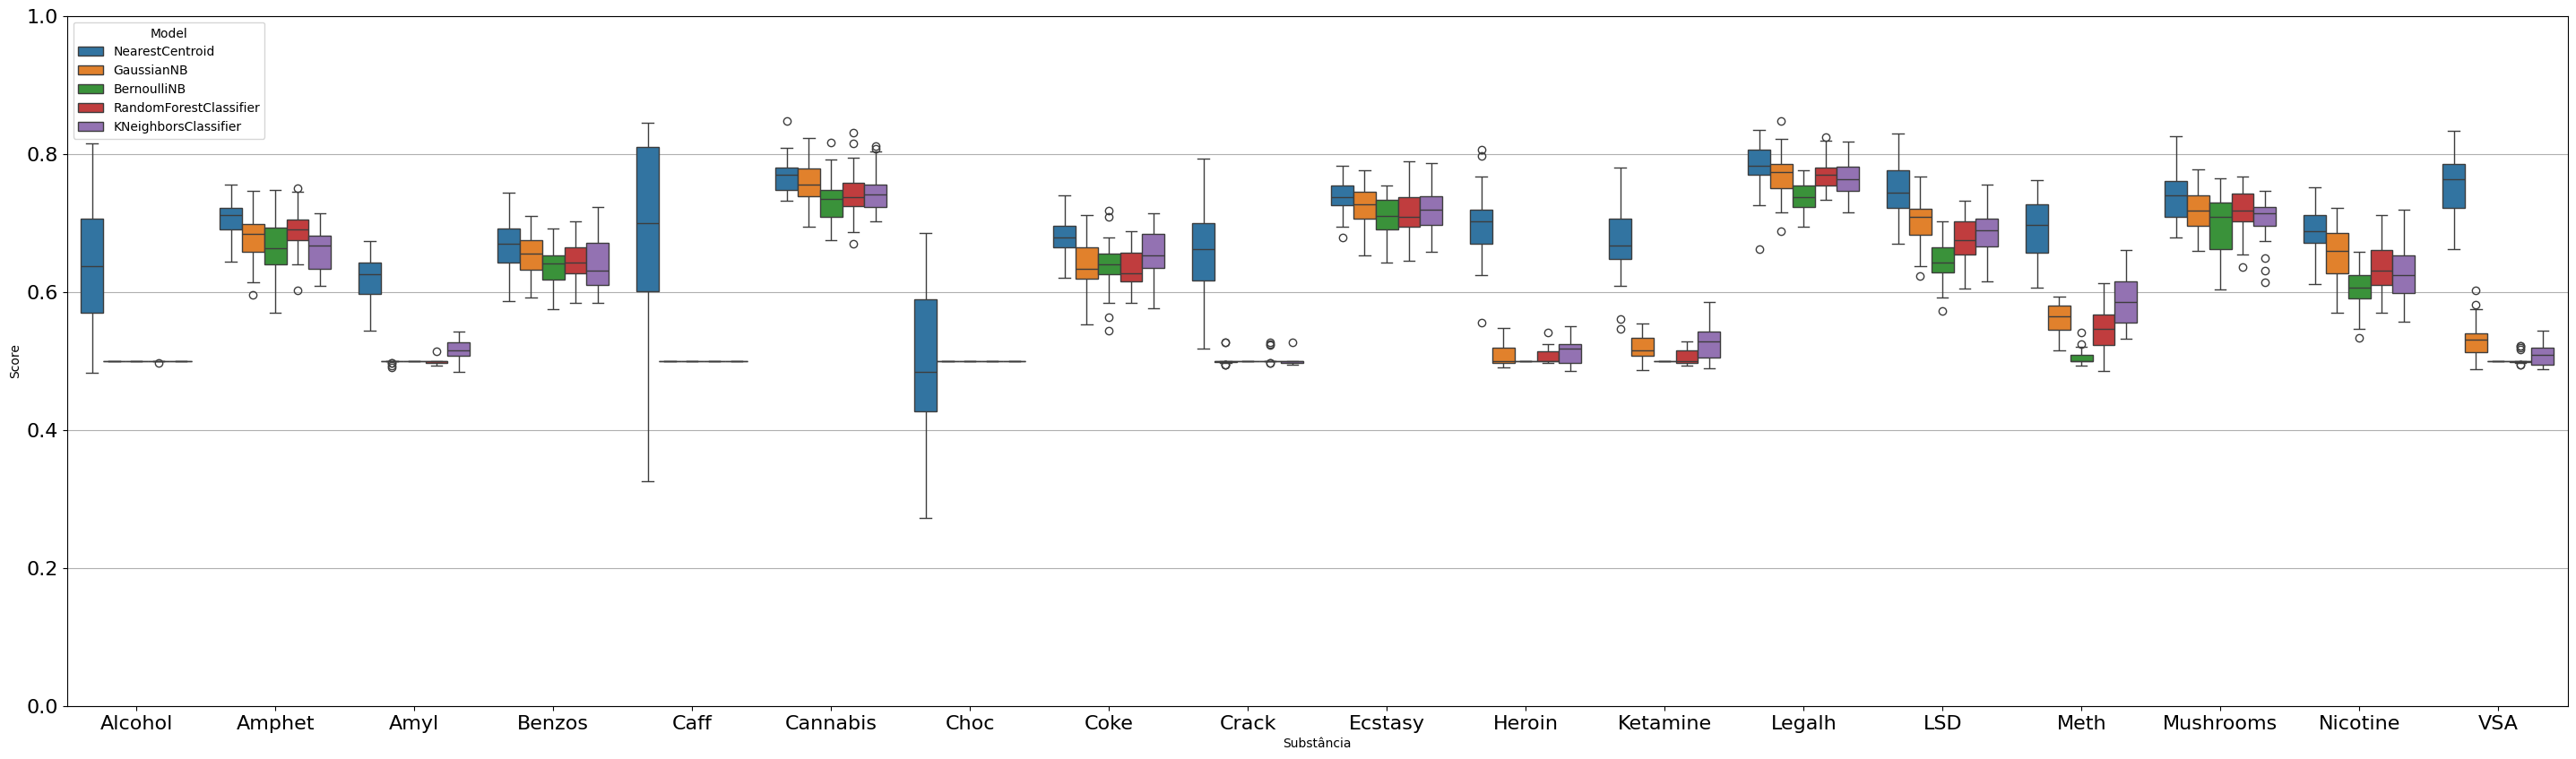

In [12]:
fig = ut.boxplot(
    results_pca,
    title=f"Boxplot de resultados aplicando PCA com {pca_comp} de variância explicada e t={t}",
)
ut.show_statistics(results_pca)

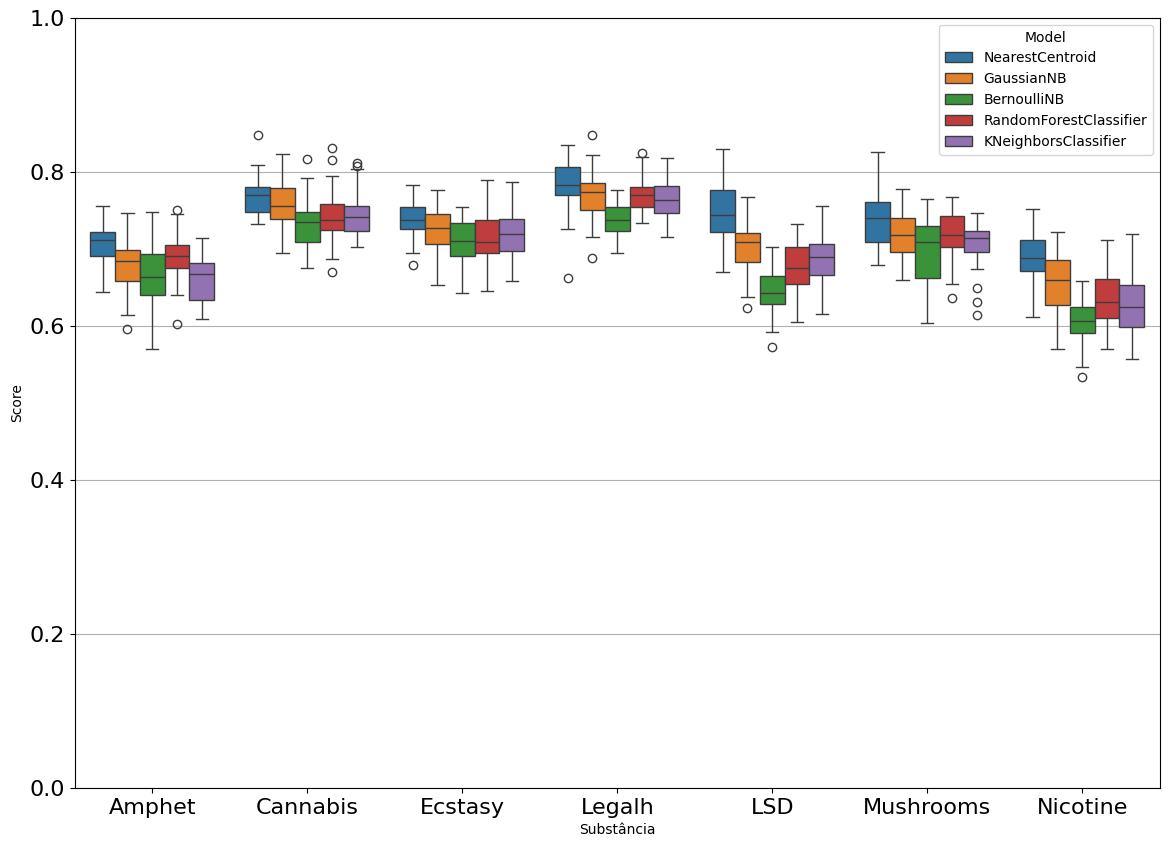

In [13]:
fig = ut.boxplot(
    results_pca,
    title=f"Boxplot de resultados aplicando PCA com {pca_comp} de variância explicada e t={t}",
    substance_filter=ut.best_k,
)
fig.savefig("../figures/pca.svg", bbox_inches='tight')

#### Confusion Matrices

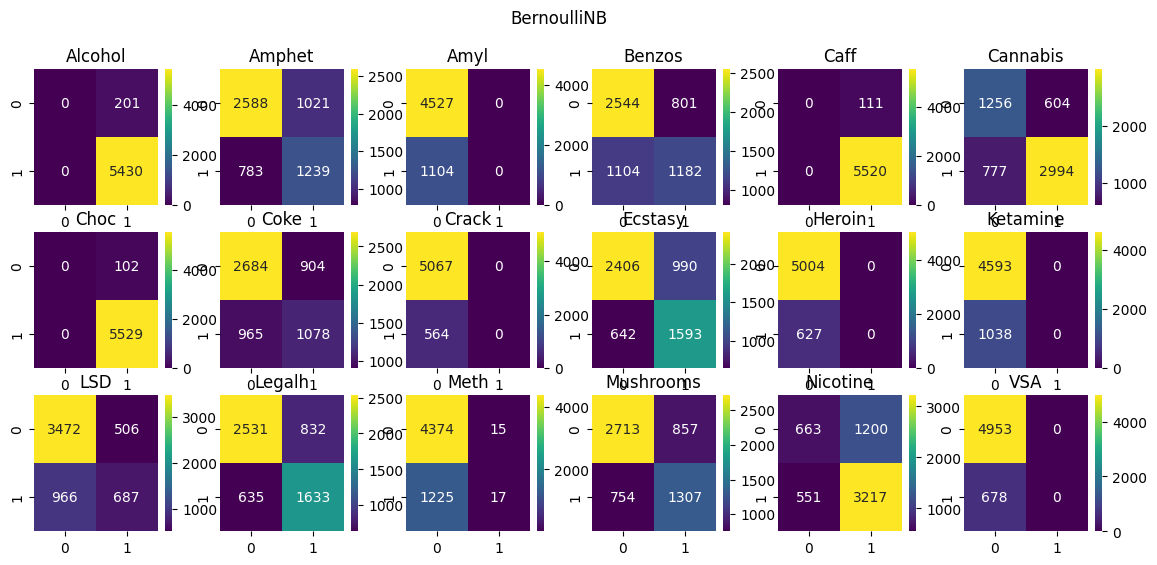

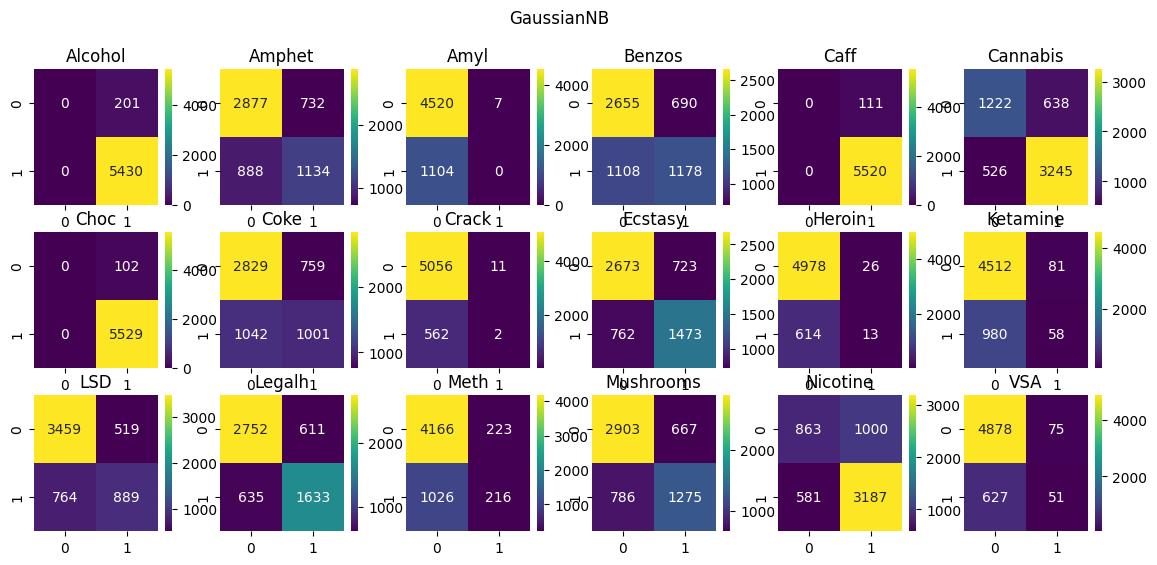

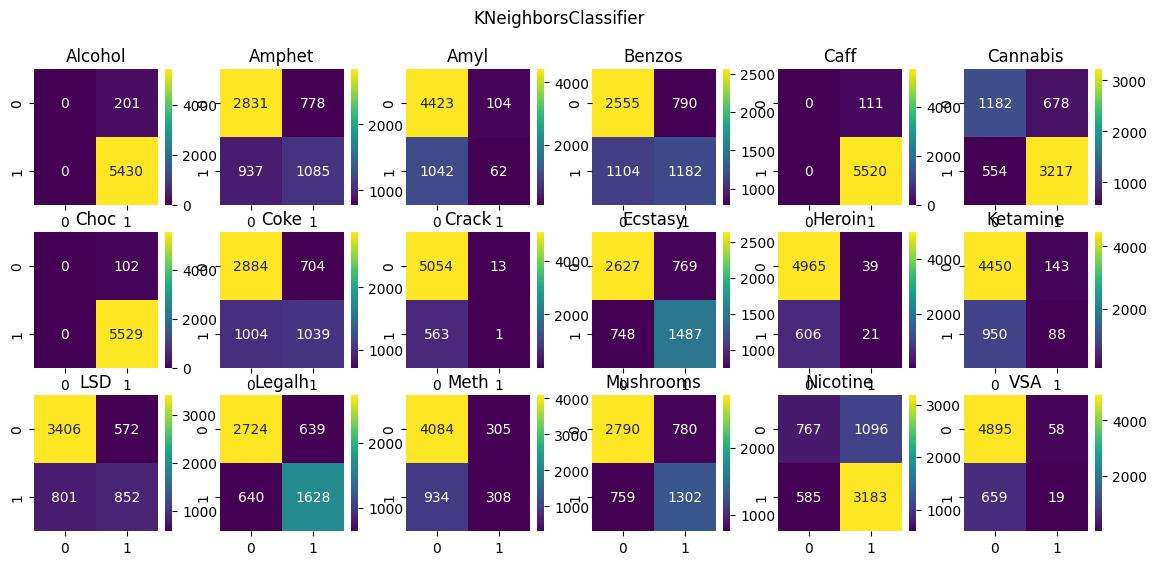

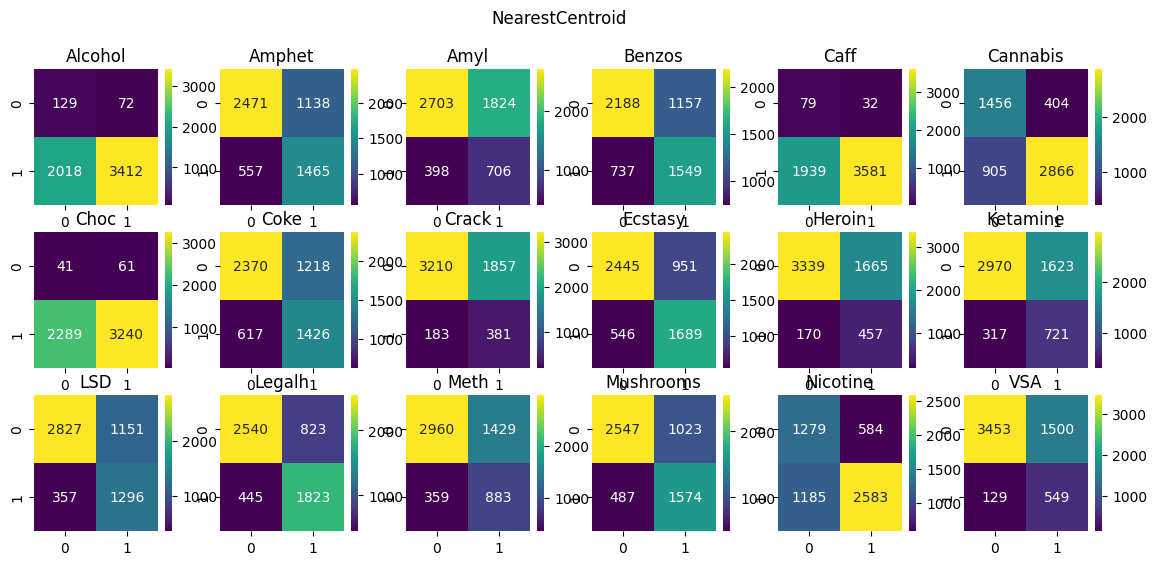

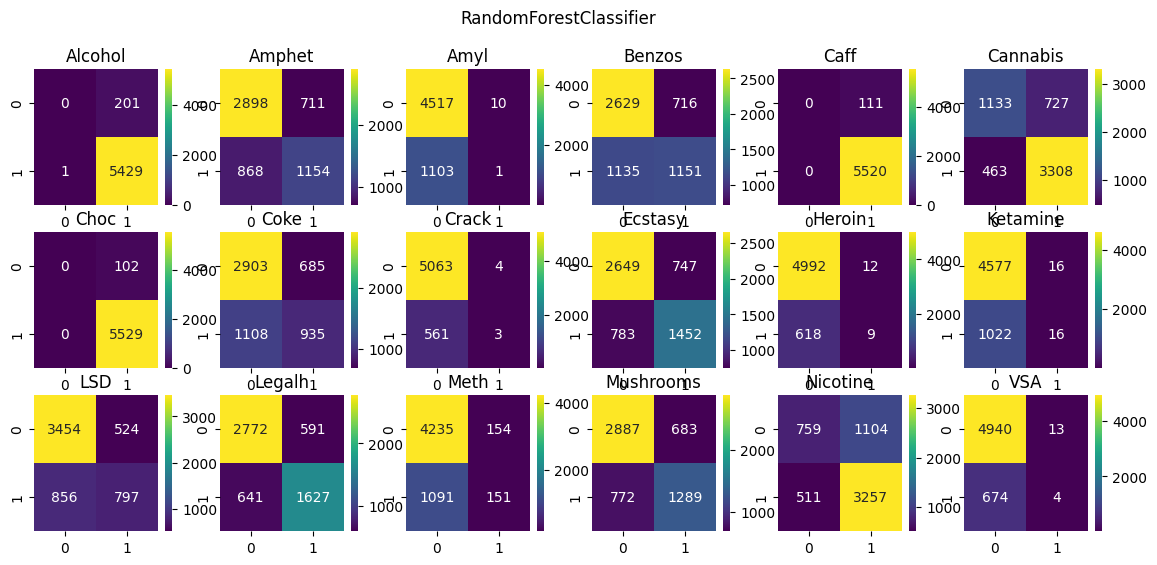

In [14]:
ut.confusion(cm_pca)

## Tratando como Multiclasse
Ao invés de tentar detectar somente dentro de um período de tempo, podemos separar em blocos maiores, de forma que possamos interpretar melhor os resultados.

Ex.: se separarmos entre década, ano e mês, podemos saber separar pessoas que
 - nunca usaram ou experimentaram pouco;
 - pararam de usar recentemente;
 - continuam usando.

In [15]:
t = [2, 4]


def multiclass_run():
    labels = y.applymap(ut.threshold, t=t)
    return ut.test_classifiers(X, labels)


results_multiclass, cm_multiclass = ut.run_or_load(
    "../results/multiclass_{a}.csv", multiclass_run if run else None
)

/home/mmamaral/2024-1-P1-Drug-Consumption/notebooks/utils.py:319: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  g = g.pivot_table(


Substância               Alcohol              Amphet                Amyl  \
                            mean       std      mean       std      mean   
Model                                                                      
BernoulliNB             0.333333  0.000000  0.444723  0.031304  0.339652   
GaussianNB              0.335641  0.014631  0.477882  0.043296  0.350742   
KNeighborsClassifier    0.334367  0.003218  0.410418  0.037176  0.340046   
NearestCentroid         0.460856  0.078406  0.512712  0.045702  0.467925   
RandomForestClassifier  0.332758  0.001122  0.403376  0.028051  0.333166   

Substância                          Benzos                Caff            \
                             std      mean       std      mean       std   
Model                                                                      
BernoulliNB             0.012294  0.434158  0.043067  0.333333  0.000000   
GaussianNB              0.022326  0.456760  0.025353  0.332764  0.001016   
KNeighborsClassifier    0.010934  0.408609  0.027575  0.333270  0.000346   
NearestCentroid         0.072906  0.484702  0.034666  0.463499  0.102377   
RandomForestClassifier  0.003855  0.404432  0.027960  0.333333  0.000000   

Substância              Cannabis                Choc                Coke  \
                            mean       std      mean       std      mean   
Model                                                                      
BernoulliNB             0.561164  0.031828  0.333333  0.000000  0.417754   
GaussianNB              0.566090  0.033655  0.333333  0.000000  0.433233   
KNeighborsClassifier    0.576507  0.031993  0.333333  0.000000  0.393401   
NearestCentroid         0.586553  0.029910  0.308779  0.098195  0.512010   
RandomForestClassifier  0.575469  0.025430  0.333333  0.000000  0.388306   

Substância                           Crack             Ecstasy            \
                             std      mean       std      mean       std   
Model                                                                      
BernoulliNB             0.023287  0.364943  0.027466  0.488328  0.033913   
GaussianNB              0.036431  0.371703  0.032521  0.514434  0.041542   
KNeighborsClassifier    0.029054  0.332939  0.000802  0.452665  0.038430   
NearestCentroid         0.049051  0.481260  0.108115  0.537967  0.041632   
RandomForestClassifier  0.018667  0.332873  0.000849  0.453004  0.027342   

Substância                Heroin            Ketamine                 LSD  \
                            mean       std      mean       std      mean   
Model                                                                      
BernoulliNB             0.370314  0.037224  0.372710  0.028347  0.467261   
GaussianNB              0.416661  0.072060  0.402111  0.045309  0.512177   
KNeighborsClassifier    0.333209  0.004642  0.343430  0.011078  0.414692   
NearestCentroid         0.523051  0.072245  0.496191  0.075732  0.542367   
RandomForestClassifier  0.337754  0.009336  0.335140  0.005601  0.418313   

Substância                          Legalh                Meth            \
                             std      mean       std      mean       std   
Model                                                                      
BernoulliNB             0.052787  0.504111  0.029012  0.394728  0.031705   
GaussianNB              0.044666  0.527483  0.037298  0.445449  0.042623   
KNeighborsClassifier    0.030009  0.486890  0.032653  0.362897  0.024915   
NearestCentroid         0.039289  0.560413  0.034741  0.476875  0.056851   
RandomForestClassifier  0.025401  0.496807  0.028289  0.356404  0.020701   

Substância             Mushrooms            Nicotine                 VSA  \
                            mean       std      mean       std      mean   
Model                                                                      
BernoulliNB             0.444343  0.026821  0.467240  0.024802  0.412417   
GaussianNB              0.488971  0.040073

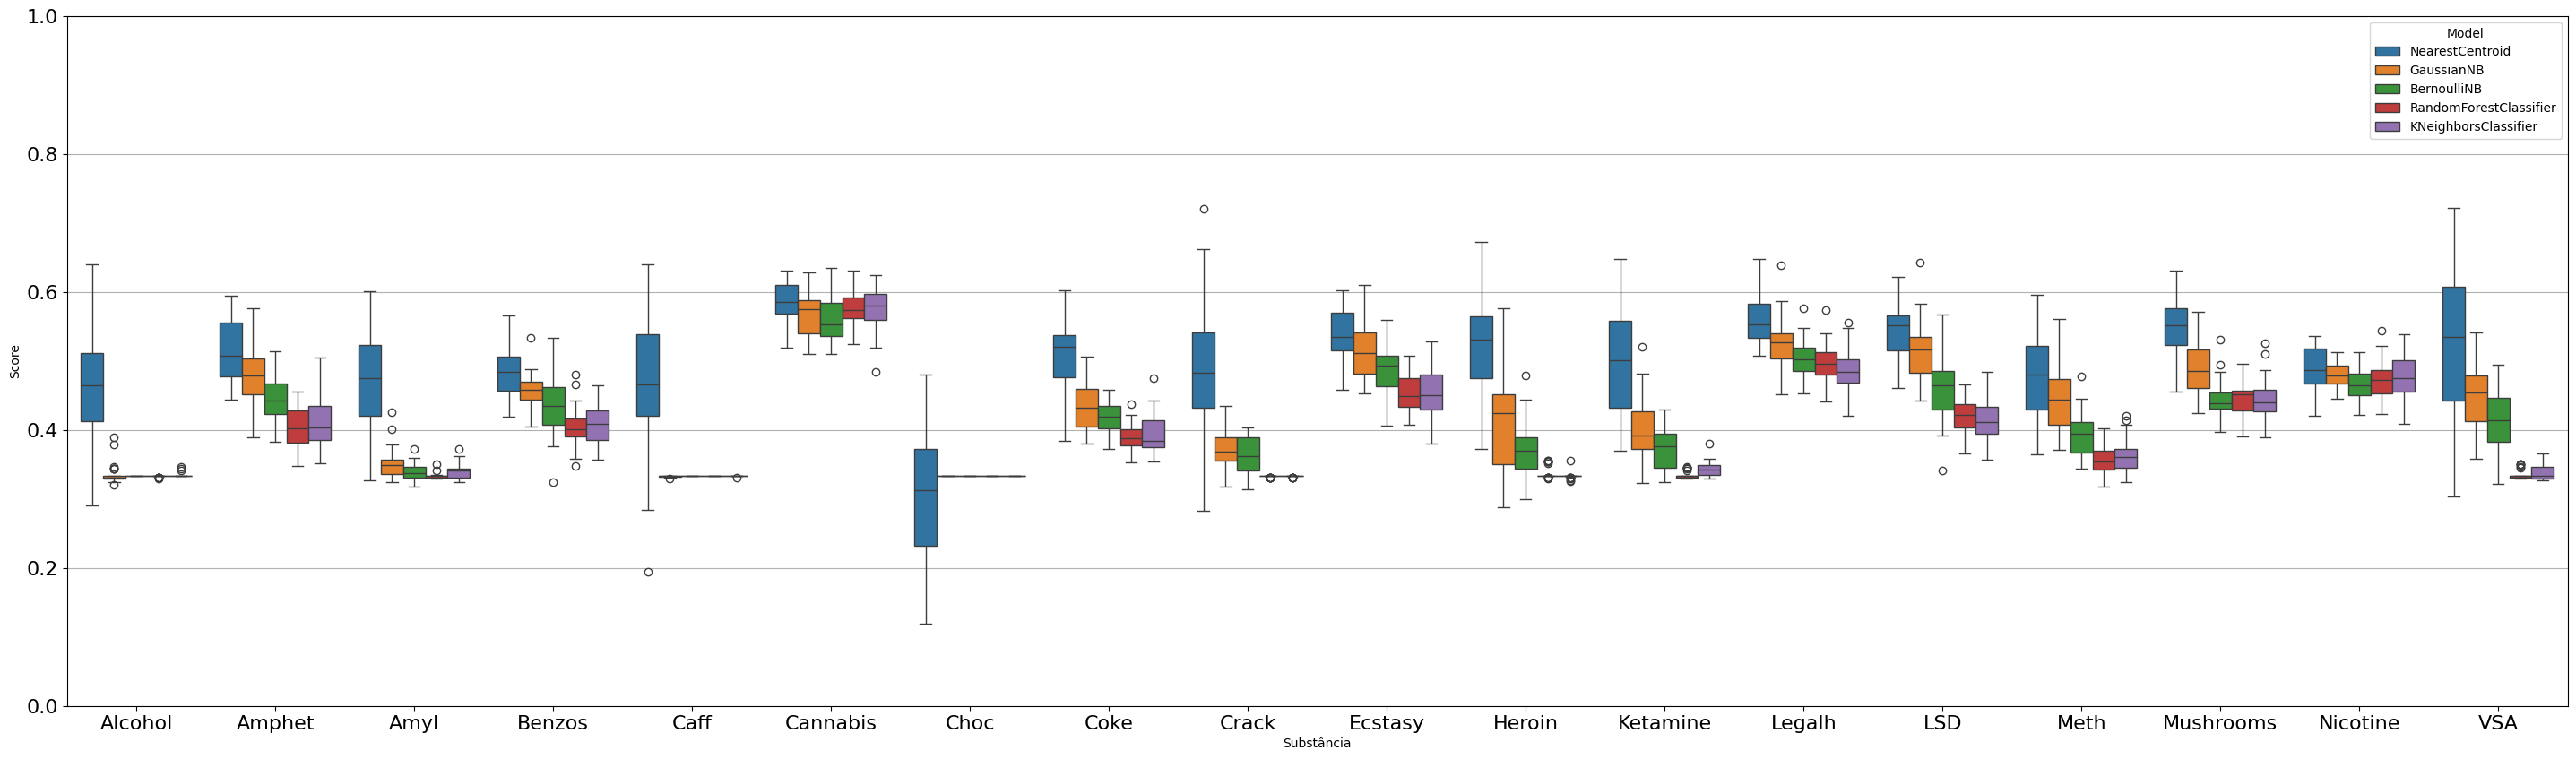

In [16]:
fig = ut.boxplot(results_multiclass, f"Resultados com multiclasse")
ut.show_statistics(results_multiclass)

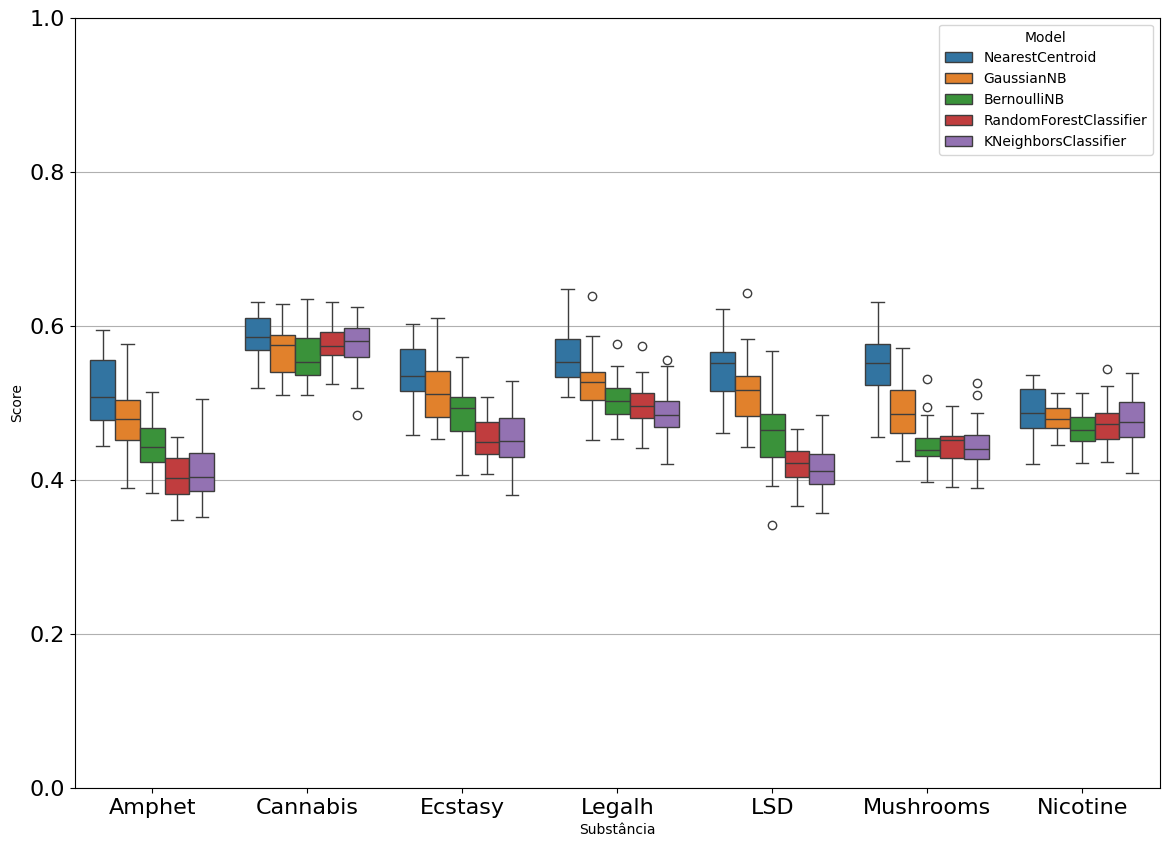

In [17]:
fig = ut.boxplot(
    results_multiclass,
    f"Resultados com multiclasse",
    substance_filter=ut.best_k,
)
fig.savefig("../figures/multiclass.svg", bbox_inches='tight')

### Confusion Matrices

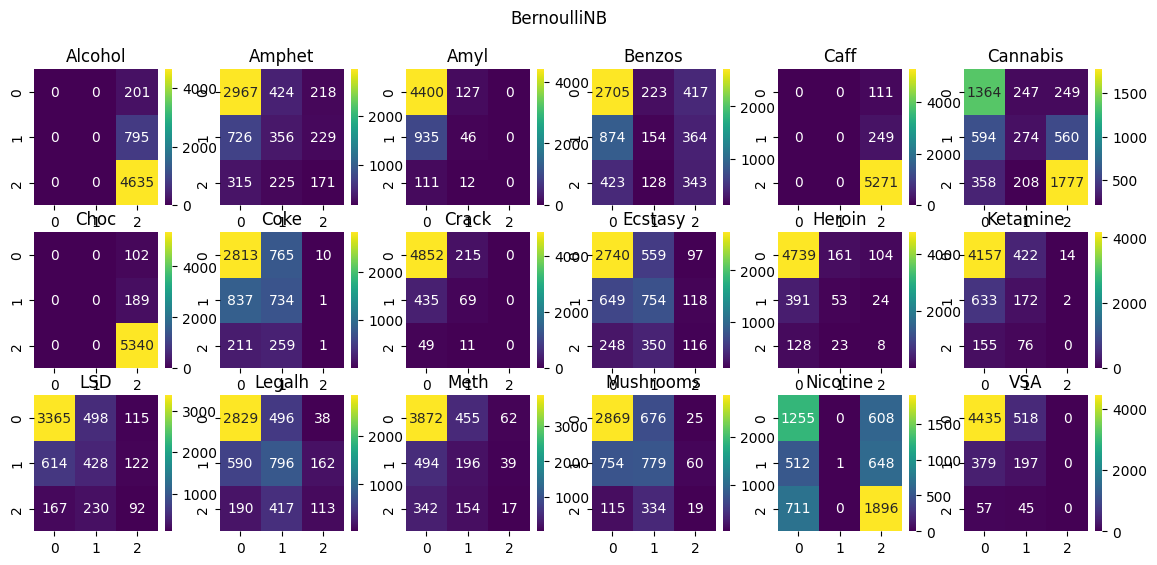

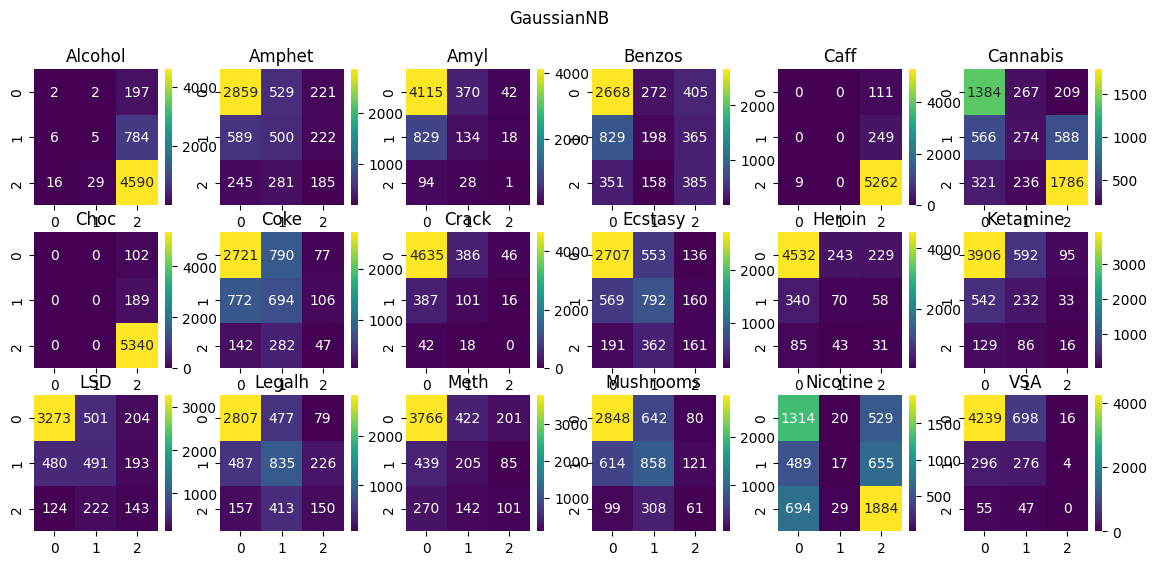

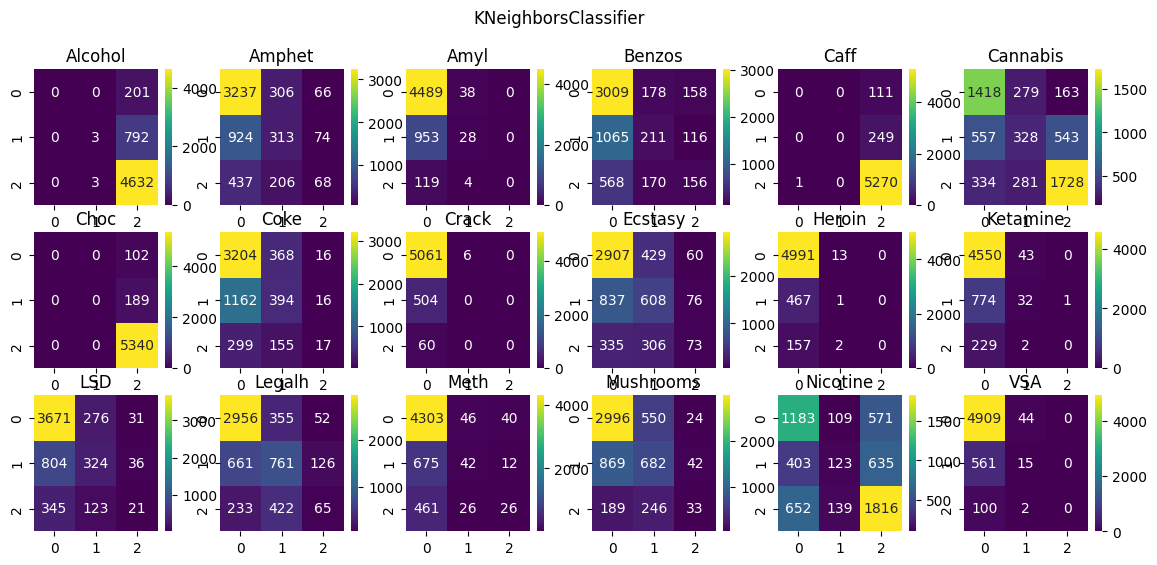

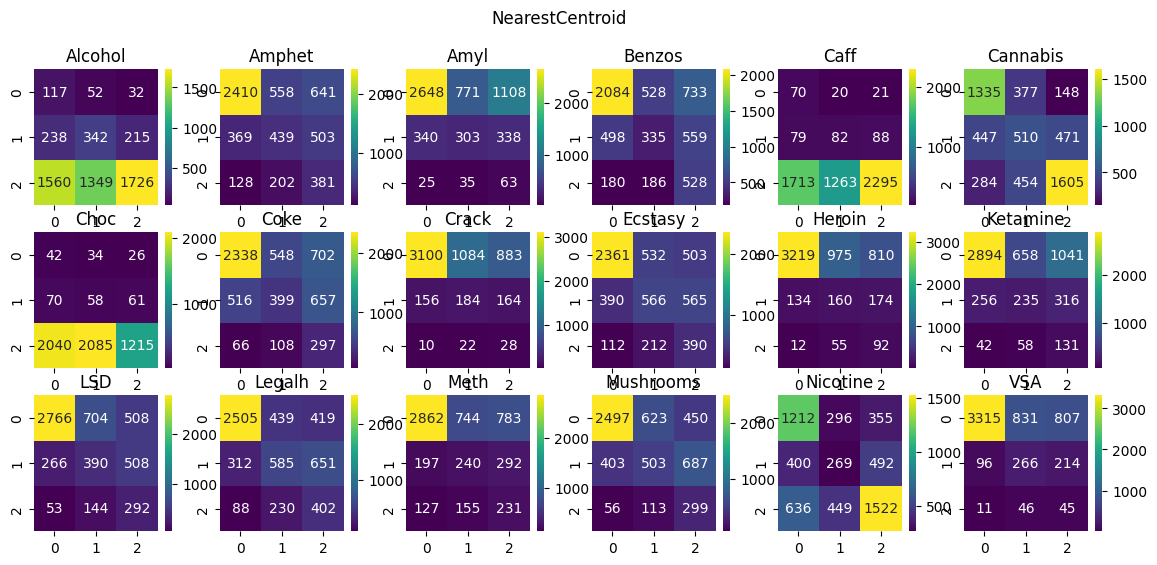

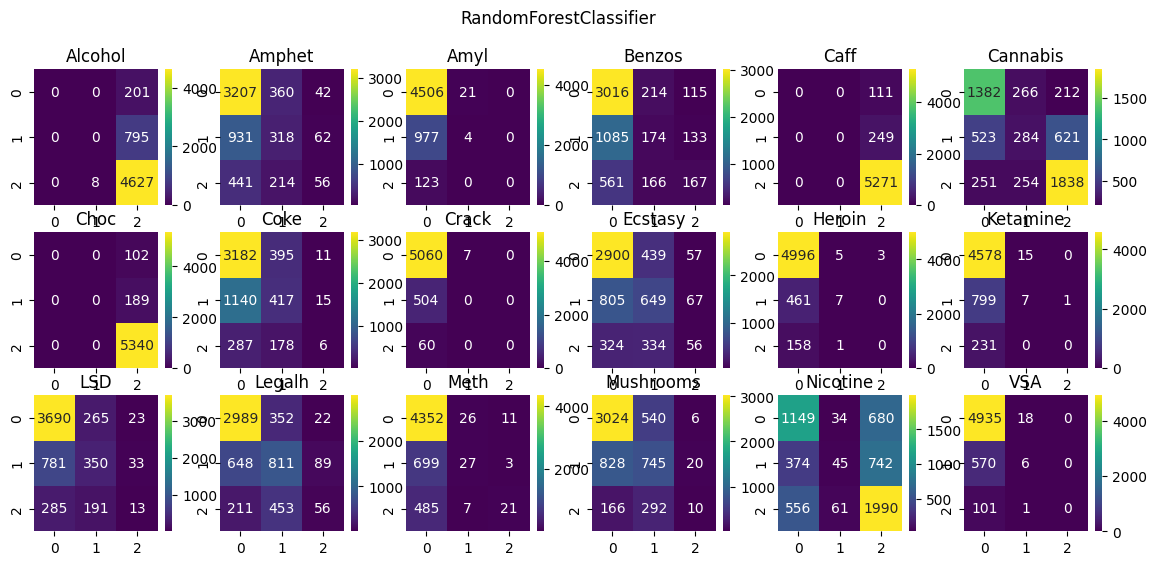

In [18]:
ut.confusion(cm_multiclass)